In [2]:
from parameters import parameters as par
from model import Model
from modules.loader import Loader
from modules.interp import Interpolate3D, Majority3D
from modules.meshmapping import create_lookup_dict, create_mesh
from modules.stategrid import create_statespace, create_m_grid, create_f_grid, create_p_grid
#import pickle

In [2]:
V_sol, C_sol = Model().solve(par)

======== BEGINNING ============
Solution at time step t:  89 , time is:  2019-05-14 09:32:46.873094
0 time is:  2019-05-14 09:32:47.354397
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079367729964236
-27.42062441954464 10.079

/Users/Jeppe/.local/share/virtualenvs/dypa_termpaper-laBhpRgB/lib/python3.7/site-packages/scipy/optimize/_minimize.py:761: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


 16495.33790248513
-36.866716333179795 16495.33790248513
-36.866716333179795 16495.33790248513
-36.866716333179795 16495.33790248513
-36.866716333179795 16495.33790248513
-36.866716333179795 16495.33790248513
-36.866716333179795 16495.33790248513
-36.866716333179795 16495.33790248513
-36.866716333179795 16495.33790248513
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416286583
-40.13645130488016 138030.18416

/Users/Jeppe/.local/share/virtualenvs/dypa_termpaper-laBhpRgB/lib/python3.7/site-packages/scipy/optimize/_minimize.py:761: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


======== ENDING ===========
 t = 88 solved in 11.6 secs
======== BEGINNING ============
Solution at time step t:  87 , time is:  2019-05-14 09:32:59.466604
0 time is:  2019-05-14 09:32:59.466880
======== ENDING ===========
 t = 87 solved in 11.4 secs
======== BEGINNING ============
Solution at time step t:  86 , time is:  2019-05-14 09:33:10.864501
0 time is:  2019-05-14 09:33:10.865045
======== ENDING ===========
 t = 86 solved in 11.3 secs
======== BEGINNING ============
Solution at time step t:  85 , time is:  2019-05-14 09:33:22.190417
0 time is:  2019-05-14 09:33:22.190721
======== ENDING ===========
 t = 85 solved in 11.4 secs
======== BEGINNING ============
Solution at time step t:  84 , time is:  2019-05-14 09:33:33.631619
0 time is:  2019-05-14 09:33:33.631926
======== ENDING ===========
 t = 84 solved in 11.4 secs
======== BEGINNING ============
Solution at time step t:  83 , time is:  2019-05-14 09:33:45.009528
0 time is:  2019-05-14 09:33:45.009806
======== ENDING =========

In [3]:
Loader.save(V_sol, C_sol, par, file_prefix='lars')

In [7]:
V_sol, C_sol, par_ = Loader.load(file_prefix='lars')

In [127]:
import numpy as np
from agent import update_f, calc_a, R_tilde

class Simulator(Model):
        
    NUMPY_SEED = 42
    SHOCK_SCALE = 0.1
    KAPPA_SCALER = 1.8182

    
    @classmethod
    def simulate(cls, V_sol, C_sol, par, n_persons=1):
        
        np.random.seed(cls.NUMPY_SEED)
        timesteps =  par.max_age - par.start_age + 1
        shocks = np.random.normal(size=(3,timesteps,n_persons), scale=cls.SHOCK_SCALE)
        choices = np.empty(shape=(3,timesteps,n_persons))
        states = np.empty(shape=(3,timesteps,n_persons))
        
        #notes on subsetting:
        # [variables, timestep_index (ix NOT t), person_ix]
        
        #letting the first state be said
        for pix in range(n_persons):
            states[0, 0, pix], states[1, 0, pix], states[2, 0, pix] = 2, 0, 1

        m_grid = create_m_grid(par)
        p_grid = create_p_grid(par)
        f_grid = create_f_grid(par)
        statespace = create_statespace(par)
       
        m, f, p = 2, 0, 0 #cannot start with zero income
        
        for ix, t in enumerate(range(par.start_age, par.max_age + 1)):
            
            print("In period: ", t, "ix: ", ix)
            
            #interpolators
            interp_c, interp_kappa, interp_i = cls.create_interpolators(C_sol,
                                                                        t, 
                                                                        statespace, 
                                                                        m_grid, 
                                                                        f_grid, 
                                                                        p_grid,
                                                                        par
                                                                       )
                                                                        
            
            for person_ix in range(n_persons):
                
                #subsetting the persons shock
                psi, xi, eps = shocks[:,ix,person_ix]
                
                #subsetting the persons states:
                m, f, p = states[:,ix,person_ix]
                
                c = interp_c.interpolate(m, f, p)
                kappa = interp_kappa.interpolate(m, f, p) 
                i = interp_i.interpolate(m, f, p)
                
                try:
                    m_fut, f_fut, p_fut = cls.upd_stts(t, m, f, p, c, kappa, i, psi, xi, eps, par)
                except:
                    return states, choices
                
                states[:,ix + 1, person_ix] = m_fut, f_fut, p_fut
                choices[:, ix, person_ix] = c, kappa, i
                
                
                
        return interp_c
                
    @classmethod
    def create_interpolators(cls, C_sol, t, statespace, m_grid, f_grid, p_grid, par):
        choices_c = C_sol[t][:,0]
        choices_kappa = C_sol[t][:,1]
        choices_i = C_sol[t][:,2]
        
        ld_c = create_lookup_dict(statespace, choices_c)
        ld_kappa = create_lookup_dict(statespace, choices_kappa)
        ld_i = create_lookup_dict(statespace, choices_i)
        
        mesh_c = create_mesh(m_grid, f_grid, p_grid, ld_c, par)
        mesh_kappa = create_mesh(m_grid, f_grid, p_grid, ld_kappa, par)
        mesh_i = create_mesh(m_grid, f_grid, p_grid, ld_i, par)
        
        interp_c = Interpolate3D(m_grid, f_grid, p_grid, mesh_c)
        interp_kappa = Majority3D(m_grid, f_grid, p_grid, mesh_kappa, 0, 0.55)
        interp_i = Majority3D(m_grid, f_grid, p_grid, mesh_i, 0, 1)
        
        return interp_c, interp_kappa, interp_i
    
    @classmethod
    def upd_stts(cls, t, m, f, p, c, kappa, i, psi, xi, eps, par):
        
        "Update states -> dynamic of model"
        state = update_f(i, f, par) # updateting to f_t+1
        assets = calc_a(c, i, kappa, m, par)

        interest_factor = R_tilde(kappa, f, par, shock=eps)
        income = xi * (par.G * p * psi) + par.age_poly[t]

        # Future state values
        m_fut = interest_factor * assets + income
        p_fut = par.G * p * psi
        f_fut = np.float64(state)
        
        #print(p, psi, par.G)
        #print(p_fut)
        print(f_fut)
        
        return m_fut, f_fut, p_fut

In [128]:
states, choices = Simulator.simulate(V_sol, C_sol, par, 1)

In period:  80 ix:  0
1.0
In period:  81 ix:  1
1.96
In period:  82 ix:  2
2.8815999999999997
In period:  83 ix:  3
3.7663359999999995
In period:  84 ix:  4
4.61568256
In period:  85 ix:  5
5.4310552576
In period:  86 ix:  6
6.213813047295999
In period:  87 ix:  7
6.965260525404159
In period:  88 ix:  8
7.686650104387993
In period:  89 ix:  9
8.379184100212473
In period:  90 ix:  10


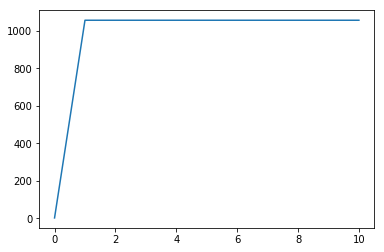

In [129]:
import matplotlib.pyplot as plt
plt.plot(states[0,:])
plt.show()

In [92]:
choices[0,:]

array([[ 1.99999945e+00],
       [ 1.05599998e+03],
       [ 1.05600000e+03],
       [ 1.05600000e+03],
       [ 1.05600000e+03],
       [ 1.05600000e+03],
       [ 1.05600000e+03],
       [ 1.05600000e+03],
       [ 1.05600000e+03],
       [ 1.05600000e+03],
       [-4.63417693e-02]])

In [20]:
np.random.seed(1)

In [15]:
shocks[:,1,0].shape

(3,)

In [44]:
1 / 0.55

1.8181818181818181

In [100]:
from modules.meshmapping import create_lookup_dict, create_mesh
from modules.stategrid import create_statespace, create_m_grid, create_f_grid, create_p_grid

In [131]:
c_choices = C_sol[85][:,0]
kappa_choices = C_sol[85][:,1]
i_choices = C_sol[85][:,2]

In [ ]:
create_mesh()